## For RT-Sort manuscript

In [1]:
from pathlib import Path
import numpy as np

In [7]:
# MEA models
SAVE_PATH = Path("/data/MEAprojects/DLSpikeSorter/models/v0_4_4")
MODEL_PATHS = [
    "/data/MEAprojects/DLSpikeSorter/models/v0_4_4/2950/230101_133131_959516",
    "/data/MEAprojects/DLSpikeSorter/models/v0_4_4/2953/230101_133514_582221",
    "/data/MEAprojects/DLSpikeSorter/models/v0_4_4/2954/230101_134042_729459",
    "/data/MEAprojects/DLSpikeSorter/models/v0_4_4/2957/230101_134408_403069",
    "/data/MEAprojects/DLSpikeSorter/models/v0_4_4/5116/230101_134927_487762",
    "/data/MEAprojects/DLSpikeSorter/models/v0_4_4/5118/230101_135307_305876",
    "/data/MEAprojects/DLSpikeSorter/models/v0_4_4/5118/230101_135307_305876",
]
##
all_train_losses = []
all_val_losses = []
for path in MODEL_PATHS:
    log_path = Path(path) / "log"
    all_train_losses.append(np.load(log_path / "train_perf.npy")[:, 0])
    all_val_losses.append(np.load(log_path / "val_perf.npy")[:, 0])

SAVE_PATH.mkdir(exist_ok=True, parents=True)
np.save(SAVE_PATH / "all_training_train_losses.npy", all_train_losses)
np.save(SAVE_PATH / "all_training_val_losses.npy", all_val_losses)

/home/mea/anaconda3/envs/si_dl_ss/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [8]:
# Neuropixels models
SAVE_PATH = Path("/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_744912849/session_766640955/dl_models/240318")
MODEL_PATHS = [
    "/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_744912849/session_766640955/dl_models/240318/a/240318_161415_981130",
    "/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_744912849/session_766640955/dl_models/240318/b/240318_163253_679441",
    "/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_744912849/session_766640955/dl_models/240318/c/240318_165245_967091",
    "/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_744912849/session_766640955/dl_models/240318/d/240318_172719_805804",
    "/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_744912849/session_766640955/dl_models/240318/e/240318_174428_896437",
    "/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_744912849/session_766640955/dl_models/240318/f/240318_180745_727120",
]
##
all_train_losses = []
all_val_losses = []
for path in MODEL_PATHS:
    log_path = Path(path) / "log"
    all_train_losses.append(np.load(log_path / "train_perf.npy")[:, 0])
    all_val_losses.append(np.load(log_path / "val_perf.npy")[:, 0])

SAVE_PATH.mkdir(exist_ok=True, parents=True)
np.save(SAVE_PATH / "all_training_train_losses.npy", all_train_losses)
np.save(SAVE_PATH / "all_training_val_losses.npy", all_val_losses)

/home/mea/anaconda3/envs/si_dl_ss/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


## For Koch's 240119 visit

In [2]:
from pathlib import Path
import pickle

import matplotlib.pyplot as plt
import numpy as np

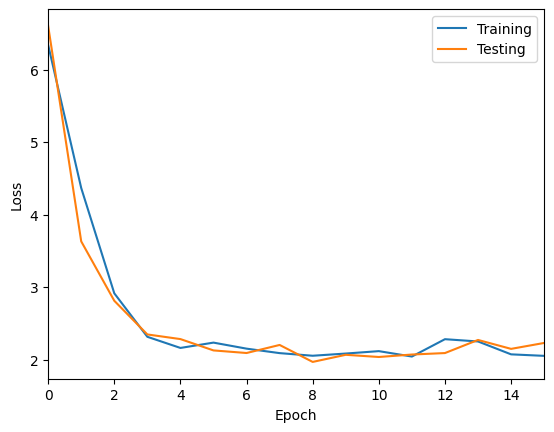

In [7]:
train_perfs = []
val_perfs = []
shortest = 100

for path in [
    "/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_744912849/session_766640955/dl_models/240116/a/240116_175558_493190/log",
    "/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_744912849/session_766640955/dl_models/240116/b/240116_184247_721495/log",
    "/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_744912849/session_766640955/dl_models/240116/c/240116_192322_547535/log",
    "/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_744912849/session_766640955/dl_models/240116/d/240116_194854_581657/log",
    "/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_744912849/session_766640955/dl_models/240116/e/240116_205425_307725/log",
    "/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_744912849/session_766640955/dl_models/240116/f/240116_212722_962802/log"
]:
    path = Path(path)
    train_perf = np.load(path / "train_perf.npy")[:, 0]
    train_perfs.append(train_perf)
    
    val_perf = np.load(path / "val_perf.npy")[:, 0]
    val_perfs.append(val_perf)
    
    shortest = min(shortest, len(train_perf))
    
train_perfs = np.array([p[:shortest] for p in train_perfs])
val_perfs = np.array([p[:shortest] for p in val_perfs])

plt.plot(np.mean(train_perfs, axis=0), label="Training")
plt.plot(np.mean(val_perfs, axis=0), label="Testing")
plt.xlim(0, shortest-1)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.savefig("/data/MEAprojects/RT-Sort/figures/230119_presentation/loss_vs_epoch.png", format="png")
with open('/data/MEAprojects/RT-Sort/figures/230119_presentation/loss_vs_epoch.pickle', "wb") as file:
    pickle.dump(plt.gcf(), file)

In [9]:
train_perfs_mean = np.mean(train_perfs, axis=0)
train_perfs_std = np.std(train_perfs, axis=0)

val_perfs_mean = np.mean(val_perfs, axis=0)
val_perfs_std = np.std(val_perfs, axis=0)

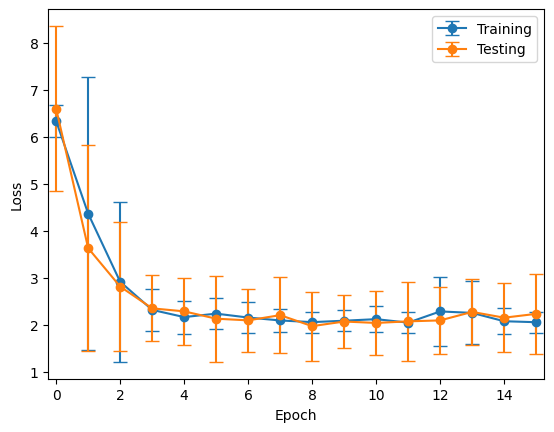

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)

# Generate x-axis values (assuming equal spacing)
x_values = np.arange(len(train_perfs_mean))

# Plotting with error bars and caps
plt.errorbar(x_values, train_perfs_mean, yerr=train_perfs_std, fmt='o-', label='Training', capsize=5)
plt.errorbar(x_values, val_perfs_mean, yerr=val_perfs_std, fmt='o-', label="Testing", capsize=5)

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Adding legend
plt.legend()
plt.xlim(-0.25, shortest-0.75)
# Display the plot
# plt.show()

plt.savefig("/data/MEAprojects/RT-Sort/figures/230119_presentation/loss_vs_epoch_with_std_error_bars.png", format="png")
with open('/data/MEAprojects/RT-Sort/figures/230119_presentation/loss_vs_epoch_with_std_error_bars.pickle', "wb") as file:
    pickle.dump(plt.gcf(), file)

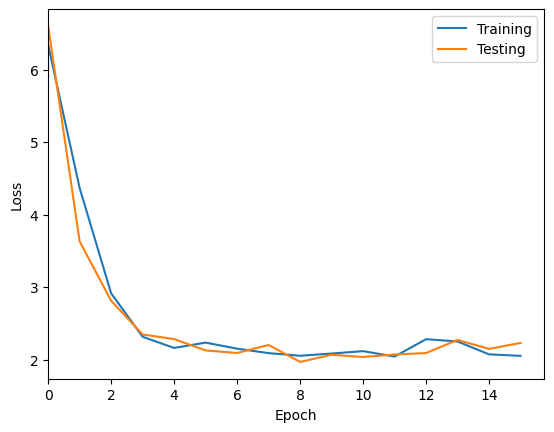

In [31]:
with open('/data/MEAprojects/RT-Sort/figures/230119_presentation/loss_vs_epoch.pickle', "rb") as file:
    loaded_fig = pickle.load(file)
plt.figure(loaded_fig.number)
plt.show()